## Introduction

The paper, **Detecting Heart Disease from Multi-View Ultrasound Images via Supervised Attention Multiple Instance Learning** addresses the significant challenge of diagnosing Aortic Stenosis (AS), a severe valve condition that causes considerable morbidity and mortality, from ultrasound images. Traditional methods for AS diagnosis involve expert review of echocardiography images, but this manual process is prone to under-diagnosis and under-treatment due to its dependence on expert availability and their subjective interpretation. The authors introduce a novel approach leveraging deep learning to automate AS screening, focusing on the ability of their model to mimic expert processes in identifying relevant views of the aortic valve across multiple ultrasound images to generate an accurate study-level diagnosis.

**Their contribution is twofold**: 

- First, they propose a new end-to-end Multiple Instance Learning (MIL) approach incorporating supervised attention, guiding the model to prioritize views relevant for AS diagnosis. This advancement addresses the limitations of previous models that either underperform due to inflexible averaging of images or lack the ability to differentiate between relevant and irrelevant views effectively. 

- Second, they introduce a self-supervised pretraining strategy focused on the entire study rather than individual images, enhancing the model's ability to understand complex patterns across multiple views. This method significantly improves upon the accuracy of AS detection, outperforming existing models while also achieving a reduction in model size, which facilitates easier deployment and application in clinical settings. Through extensive experiments using an open-access dataset and a temporally-external heldout set, the authors demonstrate the superiority of their approach in accurately diagnosing AS, thereby offering a promising tool for early screening and potentially improving patient outcomes by enabling timely treatment interventions.

*Original paper* [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10923076/)

*Citation*

@article{huang2023detecting,
  title={Detecting Heart Disease from Multi-View Ultrasound Images via Supervised Attention Multiple Instance Learning},
  author={Huang, Zhe and Wessler, Benjamin S and Hughes, Michael C},
  journal={arXiv preprint arXiv:2306.00003},
  year={2023}
}



## Scope of Reproducibily

The paper sets a high benchmark for reproducibility in computational healthcare research, especially in the domain of diagnosing heart diseases using ultrasound images. The scope of reproducibility encompasses several critical aspects. Firstly, the authors have made their code publicly available, which is a significant step towards enabling other researchers to replicate their findings, understand the nuances of their methodology, and extend the work further. This openness in sharing code ensures that the novel supervised attention multiple instance learning (MIL) approach and the self-supervised pretraining strategy can be thoroughly examined, critiqued, and built upon.

Secondly, the utilization of an open-access dataset for training and validating the model underlines the paper's commitment to reproducibility. By relying on publicly available data, the authors ensure that others can replicate their experimental setup without encountering data access barriers. This approach also allows for the evaluation of the model's effectiveness across different datasets, which is crucial for assessing its generalizability and potential applicability in various clinical settings.

Lastly, the detailed documentation of the methodology, from the formulation of the problem to the implementation of the MIL approach and the pretraining strategy, provides a clear roadmap for replication. The authors’ comprehensive descriptions of their experiments, including model parameters and evaluation metrics, further aid in reproducing the research outcomes.

*While the aforementioned statements hold true, our reproducibility efforts will prioritize two main objectives. Firstly, we aim to transform extensive Python code bases into functional notebooks, with a particular emphasis on streamlining the process. Secondly, we intend to execute successful training procedures for DSMIL, ABMIL, and SAMIL, followed by performance evaluations. Despite the considerable size of the data, we are endeavoring to conduct these tasks locally using a CUDA-powered GPU machine. Our previous attempts utilizing Colab and Drive connections yielded suboptimal performance. Depending on the time required to execute all simulations, we will adjust the dataset accordingly and present the final outcomes.*

## Dataset descriptions

The TMED dataset comprises transthoracic echocardiogram (TTE) imagery collected from routine care procedures adhering to American Society of Echocardiography (ASE) guidelines, spanning the period from 2011 to 2020 at Tufts Medical Center. During echocardiogram acquisition, a sonographer maneuvers a handheld transducer across the patient's chest, selecting various acquisition angles to comprehensively assess the intricate anatomy of the heart. This process yields multiple cineloop video clips showcasing different anatomical views of the heart. From each clip, author extracted a single still image, resulting in multiple images per patient study (typically 50-100 images). While neither view nor diagnostic labels are initially recorded during routine care, diagnostic labels, such as those for aortic stenosis (AS), are assigned by expert clinicians hours or days post-study, based on comprehensive review of the acquired videos and images. These labels are later incorporated into the patient's electronic medical record, making extraction into a machine-readable format challenging. To address this, significant annotation efforts were undertaken to assign view labels to a subset of the data, while diagnostic labels were manually extracted from existing medical records by board-certified cardiologists.

#### TMED2 Specific information

complete TMED-2 dataset release (dated 2022-07-12) contains three components:

* view_and_diagnosis_labeled_set : 599 studies from 577 unique patients (some patients have multiple studies on distinct days).

  - All patients have an aortic stenosis (AS) diagnostic label (none, early AS, or significant AS; for more see our severity diagnosis label primer)

  - Some images from each study have view label annotations (one of PLAX/PSAX/A2C/A4C/other, for more see our view label primer)

  - We partition these by patient into different "splits" of 360 training / 119 validation / 120 test studies.

* view_labeled_set : 705 studies from 703 unique patients 
  - These studies have view labels, but no AS diagnosis labels

* unlabeled_set : 5486 studies from 5287 patients



Summary statistics of latest released TMED-2 dataset

<table>
  <thead>
    <tr>
      <th style="background-color: #E55616;">Dataset</th>
      <th style="background-color: #E9672E;">Num. Patients</th>
      <th style="background-color: #E9672E;">Num. Studies</th>
      <th style="background-color: #E9672E;">Num. Labeled Images</th>
      <th style="background-color: #E9672E;">Num. Unlabeled Images</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>fully labeled set</td>
      <td>577</td>
      <td>599</td>
      <td>17270</td>
      <td>26596</td>
    </tr>
    <tr>
      <td>partially labeled set</td>
      <td>703</td>
      <td>705</td>
      <td>7694</td>
      <td>37576</td>
    </tr>
    <tr>
      <td>unlabeled set</td>
      <td>5287</td>
      <td>5486</td>
      <td>0</td>
      <td>353500</td>
    </tr>
  </tbody>
</table>

##### Dataset format

Every image in this dataset is a 2D TTE image stored at 112x112 pixel resolution in PNG format.

The top-level directory contains:

- labels, stored in comma-separated-value (CSV) plain-text files
- images, stored within folders as 112x112 pixel grayscale PNG files

Images are stored within a hierarchy of folders representing the sets that comprise TMED-2:

- <span style="color:#E32144">view_and_diagnosis_labeled_set/labeled/</span>
- <span style="color:#E32144">view_and_diagnosis_labeled_set/unlabeled/</span>
- <span style="color:#E32144">view_labeled_set/labeled/</span>
- <span style="color:#E32144">view_labeled_set/unlabeled/</span>
- <span style="color:#E32144">unlabeled_set/unlabeled/</span>


Each set's labeled/ subfolder contains only images with view labels. Each set's unlabeled/ subfolder contains only images without any view labels.

The individual image files are stored as 112x112 pixel grayscale PNG files within the appropriate folder.

For example, the fully-labeled set looks like:

- view_and_diagnosis_labeled_set/labeled/2977s1_0.png
- view_and_diagnosis_labeled_set/labeled/2977s1_1.png
- view_and_diagnosis_labeled_set/labeled/2977s1_2.png

- view_and_diagnosis_labeled_set/labeled/2977s1_19.png
- view_and_diagnosis_labeled_set/labeled/1907s2_0.png
- view_and_diagnosis_labeled_set/labeled/1907s2_1.png
- view_and_diagnosis_labeled_set/labeled/1907s2_2.png

- view_and_diagnosis_labeled_set/labeled/1907s2_24.png

The naming convention of these files is <span style="color:#E32144">[PatientID]s[StudyID]_[ImageID].png</span>

PatientIDs are unique random identifiers (consistent across the whole dataset)
Each StudyID (counting up from 1) indicates one session of echocardiogram imagery captured on one day.
Each ImageID (counting up from 0) distinguishes each image within a subset. ImageID is not unique across even the labeled/ and unlabeled/ image sets, so please use the full path if you need a unique identifier.


> *Please be advised that as per the authors' instructions, we are required to utilize their provided data information, which includes train, test, and validation sets, along with a summary table. Specifically, for TMED2, we are to utilize the folder named "view_and_diagnosis_labeled_set". We will adhere to these guidelines accordingly. You can download the necessary data folders for the experiment from the provided box link. Subsequent sections will include some basic visualizations. To execute the visualization code, please ensure that you have downloaded and stored two folders, "data_info" and "view_and_diagnosis_labeled_set", in the same directory as your notebook. This placement will also suffice for the modeling sections; hence, we will not include a separate section prior to that. However, we will include a helpful folder hierarchy to ensure organizational coherence.*



In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random
import PIL.Image as Image

#### Author provided TMED2 Summary Table Visualization

In [66]:
auther_data_summary = pd.read_csv("SAMIL/data_info/TMED2SummaryTable.csv")

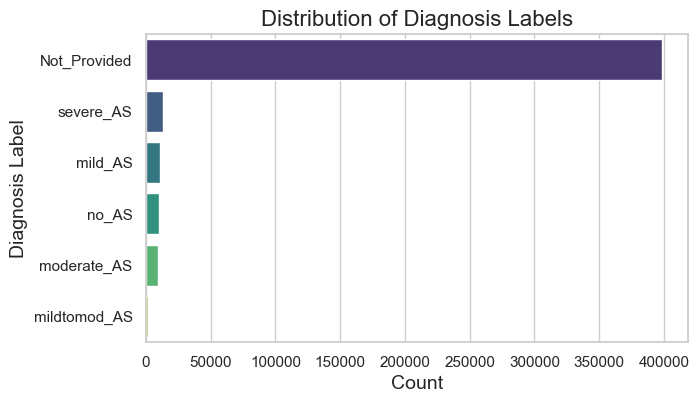

In [67]:
sns.set_theme(style="whitegrid")

diagnosis_counts = auther_data_summary['diagnosis_label'].value_counts()

plt.figure(figsize=(7, 4))
sns.barplot(x=diagnosis_counts.values, y=diagnosis_counts.index, hue=diagnosis_counts.index, palette="viridis", legend=False)
plt.title('Distribution of Diagnosis Labels', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Diagnosis Label', fontsize=14)
plt.show()





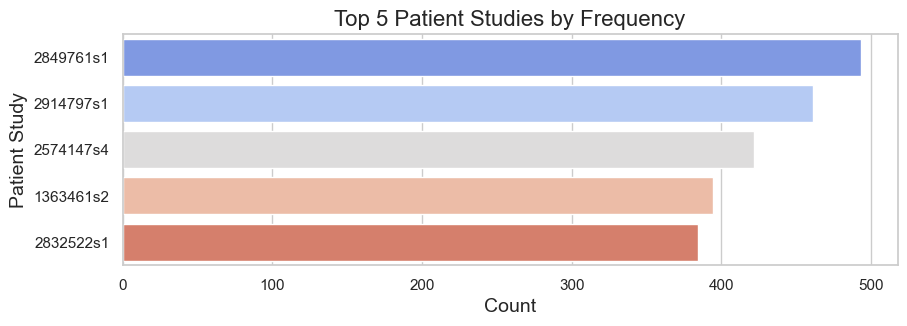

In [68]:
sns.set_theme(style="whitegrid")

study_counts = auther_data_summary['patient_study'].value_counts().head(5)

plt.figure(figsize=(10, 3))
sns.barplot(x=study_counts.values, y=study_counts.index, hue=study_counts.index, palette="coolwarm", legend=False)
plt.title('Top 5 Patient Studies by Frequency', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Patient Study', fontsize=14)
plt.show()



#### TMED2 Image label Visualization from original dataset

In [69]:
tmed2_label_per_image = pd.read_csv('dataset/TMED2/approved_users_only/approved_users_only/labels_per_image.csv')

tmed2_label_per_image


,query_key,view_label,diagnosis_label
0,4860s1_0.png,A4C,moderate_AS
1,4860s1_1.png,A2C,moderate_AS
2,4860s1_2.png,PLAX,moderate_AS
3,4860s1_3.png,PLAX,moderate_AS
4,4860s1_4.png,PLAX,moderate_AS
...,...,...,...
24959,2797s1_28.png,A4C,Not_Provided
24960,235s1_0.png,PLAX,Not_Provided
24961,235s1_1.png,A4C,Not_Provided
24962,235s1_2.png,PLAX,Not_Provided


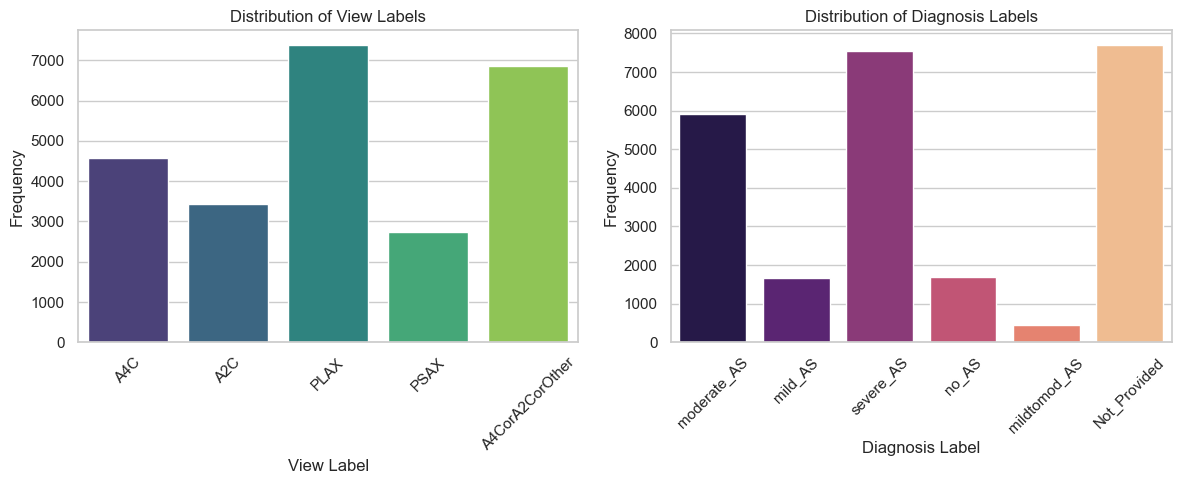

In [70]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=tmed2_label_per_image, x='view_label', hue='view_label', ax=ax[0], palette='viridis', dodge=False, legend=False)
ax[0].set_title('Distribution of View Labels')
ax[0].set_xlabel('View Label')
ax[0].set_ylabel('Frequency')

sns.countplot(data=tmed2_label_per_image, x='diagnosis_label', hue='diagnosis_label', ax=ax[1], palette='magma', dodge=False, legend=False)
ax[1].set_title('Distribution of Diagnosis Labels')
ax[1].set_xlabel('Diagnosis Label')
ax[1].set_ylabel('Frequency')

for axis in ax:
    for label in axis.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()


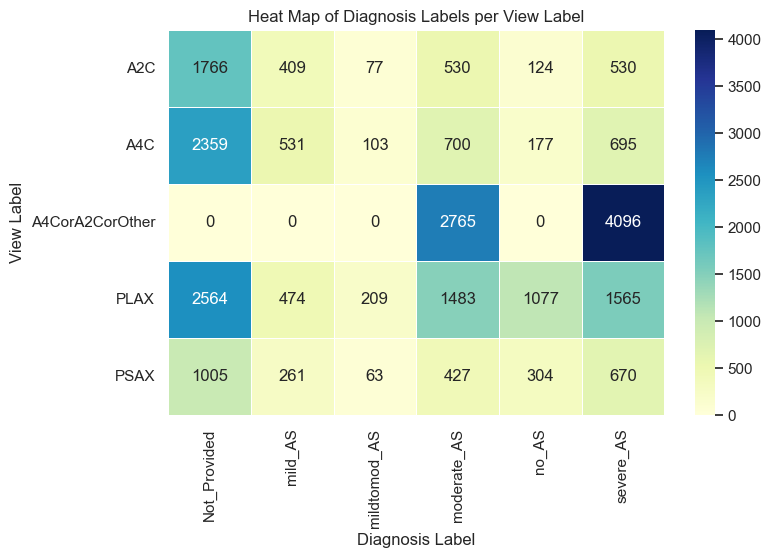

In [71]:
pivot_table_data = pd.crosstab(tmed2_label_per_image['view_label'], tmed2_label_per_image['diagnosis_label'])

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Heat Map of Diagnosis Labels per View Label')
plt.xlabel('Diagnosis Label')
plt.ylabel('View Label')
plt.show()


#### Image visualization from view_and_diagnosis_labeled_set

In [72]:
labels_per_image_csv = pd.read_csv('dataset/TMED2/approved_users_only/approved_users_only/labels_per_image.csv')

In [73]:
def find_label(query_key):
    assert len(labels_per_image_csv.index[labels_per_image_csv['query_key']==query_key].tolist())==1

    row_id = labels_per_image_csv.index[labels_per_image_csv['query_key']==query_key].tolist()[0]
    view_label = labels_per_image_csv.iloc[row_id].view_label
    diagnosis_label = labels_per_image_csv.iloc[row_id].diagnosis_label
    
    return view_label, diagnosis_label

def LoadImage(file_path):
    im = Image.open(file_path)
    im = np.asarray(im)/255
    return im

def ShowGrayscaleImage(file_path, title='', ax=None):
    print(file_path)
    im = LoadImage(file_path)
    if ax is None:
        plt.figure()
    plt.axis('off')
    
    plt.imshow(im , cmap=plt.cm.gray, vmin=0, vmax=1) #im is of float, 0-1

    plt.title(title)

In [75]:

view_and_diagnosis_labeled_set_path = os.path.join("SAMIL", 'view_and_diagnosis_labeled_set\labeled')
labeled_dir = os.listdir(view_and_diagnosis_labeled_set_path)
print('number of images in the ImageList_view_and_diagnosis_labeledset: {}'.format(len(labeled_dir)))

im_to_visualize = random.choice(labeled_dir)
view_label, diagnosis_label = find_label(im_to_visualize)

number of images in the ImageList_view_and_diagnosis_labeledset: 17270


Currently visualizing 5970s1_30.png from labeled set
view: A4CorA2CorOther, diagnosis: severe_AS
SAMIL\view_and_diagnosis_labeled_set\labeled\5970s1_30.png


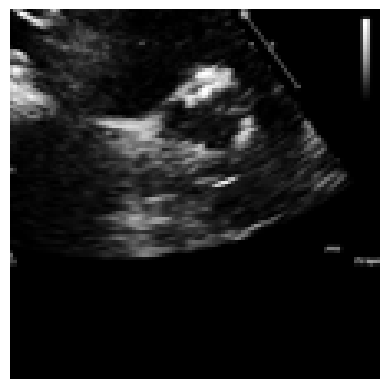

In [76]:
print('Currently visualizing {} from labeled set'.format(im_to_visualize))
print('view: {}, diagnosis: {}'.format(view_label, diagnosis_label))

ShowGrayscaleImage(os.path.join(view_and_diagnosis_labeled_set_path, im_to_visualize))

#### Model 

1. **Problem Formulation**: The task is to classify echocardiogram studies, each comprising multiple 2D ultrasound images, by severity levels of AS. The studies are represented as bags of images with each image being a 112x112 pixel grayscale frame. Diagnostic labels for these studies vary from no AS to significant AS.

2. **General MIL Architecture**: The model architecture consists of three main components:
   - **Instance Representation Layer**: Transforms each image into a feature representation using a stack of convolution layers and a multi-layer perceptron (MLP).
   - **Pooling Layer**: Aggregates features across images using an attention-weighted average to form a bag-level representation. This layer uses trainable parameters to focus on relevant features.
   - **Output Layer**: Maps the bag-level representation to a probabilistic classification of AS severity through a linear-softmax transformation.

3. **Innovations**:
   - **Supervised Attention Module**: Enhances the MIL pooling layer to focus more effectively on clinically relevant views within an echocardiogram.
   - **Study-Level Contrastive Learning**: Improves representation of entire studies, not just individual images, by contrasting the learned features of different classes to fine-tune the model's sensitivity to variations in AS severity.

4. **Training and Prediction**: The model is trained using a cross-entropy loss function to minimize the error between observed and predicted AS severity. This involves adjusting the parameters of both the representation and pooling layers, as well as the output layer, to optimize the model's predictive accuracy.

This comprehensive approach leverages deep learning and multiple instance learning to enhance the diagnostic capabilities of echocardiograms for aortic stenosis, focusing on both individual image details and holistic study characteristics.

According to authors,

In the development of the Supervised Attention Multiple Instance Learning (SAMIL) network for diagnosing aortic stenosis (AS), the process is divided into two crucial stages to maximize diagnostic accuracy. 

**Stage 1** involves self-supervised pretraining using the TMED-2 dataset. This initial phase employs a bag-level pretraining strategy that leverages both labeled and a substantial volume of unlabeled data, encompassing over 350,000 images. This broad dataset enables the model to learn a comprehensive representation of study-level features without the need for direct supervision. Once pretraining is complete, the projection head ψq is removed, and the remaining parameters (σq and fq) are preserved. These are used to warm-start the subsequent supervised phase, ensuring that the model transitions smoothly from a broadly trained base into a more focused training regime.

**Stage 2** involves fine-tuning the pretrained components (f and σ) along with the output layer g, utilizing the complete and detailed studies from TMED-2’s labeled training set. The goal in this stage is to refine the model's ability to specifically diagnose AS by focusing the training on the relevant clinical features across all available images, irrespective of their initial view label. This approach aims to minimize the overall loss, thereby enhancing the model's diagnostic precision and reliability in clinical settings. This structured training strategy ensures the model is both robust and sensitive to the nuances of varied echocardiographic data, positioning it as a potent tool in the detection of heart disease.

> From this point forward, we will begin presenting all the models and training code. Please note that we are currently in the process of converting and reorganizing the original code into an IPython Notebook format. The initial code was provided in large blocks of Python files, which we are now restructuring. Additionally, we have encountered some challenges in making the training dataset portion of the code operational. This issue stems from the code referencing a class called `EchoDataSet`, which was originally designed to create bags from TIFF files stored in individual folders. We are actively working to modify this code to accommodate PNG files from the provided dataset. Consequently, the code beyond this point may not yet be functional, as these adjustments are still underway.

In [77]:
# imports

import argparse
import logging
import math
import os
import random
import shutil
import time
import json
from tqdm import tqdm

import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.data import DataLoader
from torchvision import transforms

from torch.utils.tensorboard import SummaryWriter


In [80]:
class Config:
    def __init__(self):
        self.dataset_name = 'echo'
        self.data_seed = 0
        self.development_size = 'DEV479'
        self.training_seed = 0
        self.sampling_strategy = 'first_frame'
        self.train_epoch = 7200
        self.start_epoch = 0
        self.eval_every_Xepoch = 360
        self.Pretrained = 'Whole'
        self.resume = 'last_checkpoint.pth.tar'
        self.resume_checkpoint_fullpath = ''
        self.train_dir = "None"  # You should set this
        self.data_info_dir = "data_info"  # You should set this
        self.data_dir = "view_and_diagnosis_labeled_set"  # You should set this
        self.checkpoint_dir = "model_checkpoints"  # You should set this
        self.train_PatientStudy_list_path = None  # You should set this
        self.val_PatientStudy_list_path = None  # You should set this
        self.test_PatientStudy_list_path = None  # You should set this
        self.lr = 0.0005
        self.lr_warmup_epochs = 0
        self.lr_schedule_type = 'CosineLR'
        self.lr_cycle_epochs = 50
        self.wd = 10e-5
        self.optimizer_type = 'SGD'
        self.nesterov = True
        self.ema_decay = 0.999
        self.num_classes = 3
        self.batch_size = 1
        self.num_workers = 8
        self.patience = 200
        self.early_stopping_warmup = 200
        self.T = 0.5
        self.lambda_ViewRegularization = 1.0
        self.view_checkpoint_path = ''  # You should set this if needed
        self.ViewRegularization_warmup_pos = 0.4
        self.ViewRegularization_warmup_schedule_type = 'NoWarmup'
        self.use_class_weights = 'True'
        self.class_weights = '0.25,0.25,0.25'
        self.augmentation = 'standard'
        self.use_data_normalization = 'False'

config = Config()

In [83]:
# util functions

def configure_device():
    cuda = torch.cuda.is_available()
    if cuda:
        print('CUDA available')
        device = torch.device('cuda')
        torch.backends.cudnn.benchmark = True
        return device
    else:
        raise ValueError('Not Using GPU?')

device = configure_device()

def configure_logging():
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO)
    
configure_logging()

def determine_model_path(args):
    if args.Pretrained == 'Whole':
        base_path = 'MOCO_Pretraining_StudyLevel'
    elif args.Pretrained == 'FeatureExtractor1':
        base_path = 'MOCO_Pretraining_ImageLevel'
    elif args.Pretrained == 'NoPretrain':
        args.MIL_checkpoint_path = ''
        return
    else:
        raise NameError('Invalid pretrain option')
    
    args.MIL_checkpoint_path = os.path.join(args.checkpoint_dir, base_path, f'seed{args.data_seed}_checkpoint.pt')

determine_model_path(config)


def determine_class_weights(args):
    if args.use_class_weights == 'True' and args.development_size == 'DEV479':
        args.class_weights = '0.463,0.342,0.195'
        print('Using pre-calculated class weights')
    else:
        args.class_weights = '1.0,1.0,1.0'
        print('Not using pre-calculated class weights')

determine_class_weights(config)

def setup_experiment(args):
    experiment_name = f"ViewRegularization_warmup-{args.ViewRegularization_warmup_schedule_type}_Optimizer-{args.optimizer_type}_LrSchedule-{args.lr_schedule_type}_LrCycleEpochs-{args.lr_cycle_epochs}_lr-{args.lr}_wd-{args.wd}_T-{args.T}_lambdaViewRegularization-{args.lambda_ViewRegularization}"
    args.experiment_dir = os.path.join(args.train_dir, experiment_name)
    os.makedirs(args.experiment_dir, exist_ok=True)
    args.writer = SummaryWriter(args.experiment_dir)
    if args.resume != 'None':
        args.resume_checkpoint_fullpath = os.path.join(args.experiment_dir, args.resume)
        print('args.resume_checkpoint_fullpath:', args.resume_checkpoint_fullpath)
    else:
        args.resume_checkpoint_fullpath = None

setup_experiment(config)

def str2bool(s):
    if s == 'True':
        return True
    elif s == 'False':
        return False
    else:
        raise NameError('Bad string')

def save_checkpoint(state, checkpoint_dir, filename='last_checkpoint.pth.tar'):
    '''last_checkpoint.pth.tar or xxx_model_best.pth.tar'''
    
    filepath = os.path.join(checkpoint_dir, filename)
    torch.save(state, filepath)
    
        
#checked
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    
    
#learning rate schedule   
def get_cosine_schedule_with_warmup(optimizer,
                                    lr_warmup_epochs,
                                    lr_cycle_epochs, #total train epochs
                                    num_cycles=7./16.,
                                    last_epoch=-1):
    def _lr_lambda(current_epoch):
        if current_epoch < lr_warmup_epochs:
            return float(current_epoch) / float(max(1, lr_warmup_epochs))
#         no_progress = float(current_epoch - lr_warmup_epochs) / \
#             float(max(1, float(lr_cycle_epochs) - lr_warmup_epochs))

        #see if using restart
        ###############################################################
        if current_epoch%lr_cycle_epochs==0: 
            current_cycle_epoch=lr_cycle_epochs
        else:
            current_cycle_epoch = current_epoch%lr_cycle_epochs
        
        no_progress = float(current_cycle_epoch - lr_warmup_epochs) / \
            float(max(1, float(lr_cycle_epochs) - lr_warmup_epochs))
        #################################################################
        
        return max(0., math.cos(math.pi * num_cycles * no_progress))

    return LambdaLR(optimizer, _lr_lambda, last_epoch)     


def get_fixed_lr(optimizer,
                lr_warmup_epochs,
                lr_cycle_epochs, #total train iterations
                num_cycles=7./16.,
                last_epoch=-1):
    def _lr_lambda(current_epoch):
        
        return 1.0

    return LambdaLR(optimizer, _lr_lambda, last_epoch)   


CUDA available
Using pre-calculated class weights
args.resume_checkpoint_fullpath: None\ViewRegularization_warmup-NoWarmup_Optimizer-SGD_LrSchedule-CosineLR_LrCycleEpochs-50_lr-0.0005_wd-0.0001_T-0.5_lambdaViewRegularization-1.0\last_checkpoint.pth.tar


In [84]:
def create_view_model(args):
    
    import src.SAMIL.libml.models.view_classifier as view_models
    
    view_model = view_models.build_wideresnet(depth=28,
                                        widen_factor=2,
                                        dropout=0.0,
                                        num_classes=3)
    
    print("Total params for View Model: {:.2f}M".format(
        sum(p.numel() for p in view_model.parameters())/1e6))
    
    
    #load the saved checkpoint
    if args.data_seed==0:
        args.view_checkpoint_path = os.path.join(args.checkpoint_dir, 'view_classifier', 'seed0_model_best.pth.tar')
    elif args.data_seed==1:
        args.view_checkpoint_path = os.path.join(args.checkpoint_dir, 'view_classifier', 'seed1_model_best.pth.tar')
    elif args.data_seed==2:
        args.view_checkpoint_path = os.path.join(args.checkpoint_dir, 'view_classifier', 'seed2_model_best.pth.tar')
    else:
        raise NameError('?')
    
        
    view_checkpoint = torch.load(args.view_checkpoint_path)

    view_model.load_state_dict(view_checkpoint['ema_state_dict'])
    
    view_model.eval()
    
    return view_model

def create_model(args):
    
    from src.SAMIL.libml.models.model import SAMIL
    model = SAMIL()

    if args.MIL_checkpoint_path !='':
        print('!!!!!!!!!!!!!!!!!!!!!initializing from pretrained checkpoint!!!!!!!!!!!!!!!!!!!!!')
        pretrained_dict = torch.load(args.MIL_checkpoint_path)

        #https://discuss.pytorch.org/t/dataparallel-changes-parameter-names-issue-with-load-state-dict/60211
        #rename tensor in the pretrained dict
        from collections import OrderedDict
        new_state_dict = OrderedDict()
        for k, v in pretrained_dict.items():
#                         print(k)
            if 'encoder_q' in k:
#                             print('!extract: {}'.format(k))
                name = '.'.join(k.split('.')[1:])
#                             print('new_name: {}'.format(name))
                new_state_dict[name] = v

        model_dict = model.state_dict() 

        new_state_dict = {k: v for k, v in new_state_dict.items() if k in model_dict}
        model_dict.update(new_state_dict)

        # 3. load the new state dict
        model.load_state_dict(model_dict)

                    
        
    print("Total params: {:.2f}M".format(
        sum(p.numel() for p in model.parameters() if p.requires_grad)/1e6))
    
    return model

In [88]:
config = Config()
config.use_data_normalization = str2bool(config.use_data_normalization)

TMED2SummaryTable = pd.read_csv("SAMIL/data_info/TMED2SummaryTable.csv")

echo_mean = [0.059, 0.059, 0.059]
echo_std = [0.138, 0.138, 0.138]

TMED2SummaryTable.head()

,patient_study,diagnosis_label
0,1169513s1,no_AS
1,1169513s1,no_AS
2,1169513s1,no_AS
3,1169513s1,no_AS
4,1169513s1,no_AS


In [89]:
if config.use_data_normalization:
    transform_eval = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=echo_mean, std=echo_std)
    ])

    transform_weak = transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomCrop(size=112, padding=int(112*0.125), padding_mode='reflect'),
                transforms.ToTensor(),
                transforms.Normalize(mean=echo_mean, std=echo_std)
            ])

    if config.augmentation == 'standard':
        transform_labeledtrain = transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomCrop(size=112, padding=int(112*0.125), padding_mode='reflect'),
                transforms.ToTensor(),
                transforms.Normalize(mean=echo_mean, std=echo_std)
            ])

    elif config.augmentation == 'RandAug':
        transform_labeledtrain = transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomCrop(size=112, padding=int(112*0.125), padding_mode='reflect'),
                RandAugmentMC(n=2, m=10),
                transforms.ToTensor(),
                transforms.Normalize(mean=echo_mean, std=echo_std)
            ])

else:
    transform_eval = transforms.Compose([transforms.ToTensor()])
    
    transform_weak = transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomCrop(size=112, padding=int(112*0.125), padding_mode='reflect'),
                transforms.ToTensor(),
            ])

    if config.augmentation == 'standard':
        transform_labeledtrain = transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomCrop(size=112, padding=int(112*0.125), padding_mode='reflect'),
                transforms.ToTensor(),
            ])

    elif config.augmentation == 'RandAug':
        transform_labeledtrain = transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomCrop(size=112, padding=int(112*0.125), padding_mode='reflect'),
                RandAugmentMC(n=2, m=10),
                transforms.ToTensor(),
            ])

In [92]:
train_PatientStudy_list = pd.read_csv("SAMIL/data_info/DataPartition/seed0/DEV479/FullyLabeledSet_studies/train_studies.csv")
train_PatientStudy_list = train_PatientStudy_list['study'].values
    
val_PatientStudy_list = pd.read_csv("SAMIL/data_info/DataPartition/seed0/DEV479/FullyLabeledSet_studies/val_studies.csv")
val_PatientStudy_list = val_PatientStudy_list['study'].values

test_PatientStudy_list = pd.read_csv("SAMIL/data_info/DataPartition/seed0/DEV479/FullyLabeledSet_studies/test_studies.csv")
test_PatientStudy_list = test_PatientStudy_list['study'].values

> From this point onward, our code is not yet operational. The code you see below utilizes the `EchoDataSet` class, which is sourced from the `Echo_data.py` file in the `libml` folder. We are currently in the process of adapting this code to handle PNG files. Due to this ongoing modification, we have not included any results or evaluation data at this time. However, we have preserved the markdown placeholders for these sections, and they will be included in our final submission.

In [ ]:
train_dataset = EchoDataset(train_PatientStudy_list, TMED2SummaryTable, config.data_dir, sampling_strategy=config.sampling_strategy, training_seed=config.training_seed, transform_fn=transform_labeledtrain)
    
trainmemory_dataset = EchoDataset(train_PatientStudy_list, TMED2SummaryTable, config.data_dir, sampling_strategy='first_frame', training_seed=config.training_seed, transform_fn=transform_eval)

val_dataset = EchoDataset(val_PatientStudy_list, TMED2SummaryTable, config.data_dir, sampling_strategy='first_frame', training_seed=config.training_seed, transform_fn=transform_eval)
    
test_dataset = EchoDataset(test_PatientStudy_list, TMED2SummaryTable, config.data_dir, sampling_strategy='first_frame', training_seed=config.training_seed, transform_fn=transform_eval)

In [93]:
#### Training

def train_and_validate(args):
    logger.info("***** Running training *****")
    logger.info(f"  Task = {args.dataset_name}")
    logger.info(f"  Num Epochs = {args.train_epoch}")
    logger.info(f"  Total optimization steps = {args.train_epoch * len(train_dataset)}")
    
    train_loss_dict = {
        'Totalloss': [],
        'LabeledCEloss': [],
        'ViewRegularizationLoss': []
    }
    
    early_stopping = EarlyStopping(patience=args.patience, initial_count=current_count)
    early_stopping_warmup = args.early_stopping_warmup
    
    best_val_ema_Bacc, best_val_raw_Bacc = 0, 0
    best_test_ema_Bacc_at_val, best_test_raw_Bacc_at_val = 0, 0
    best_train_ema_Bacc_at_val, best_train_raw_Bacc_at_val = 0, 0
    
    for epoch in tqdm(range(args.start_epoch, args.train_epoch)):
        # Insert the train_one_epoch logic here
        
        if epoch % args.eval_every_Xepoch == 0:
            # Insert the eval_model logic and saving of metrics here
            
            logger.info('At RAW Best val, validation/test/train %.2f %.2f %.2f' % (best_val_raw_Bacc, best_test_raw_Bacc_at_val, best_train_raw_Bacc_at_val))
            logger.info('At EMA Best val, validation/test/train %.2f %.2f %.2f' % (best_val_ema_Bacc, best_test_ema_Bacc_at_val, best_train_ema_Bacc_at_val))
            
            if early_stopping.early_stop:
                logger.info("Early stopping triggered.")
                break
    
    args.writer.close()
    save_final_summary(args, brief_summary)

def save_final_summary(args, summary):
    with open(os.path.join(args.experiment_dir, "brief_summary.json"), "w") as f:
        json.dump(summary, f)


In [ ]:
class EarlyStopping:
    def __init__(self, patience, initial_count):
        self.patience = patience
        self.counter = initial_count
        self.early_stop = False
    
    def __call__(self, metric):
        # Implement logic based on metric
        pass


#### Evaluation

#### *TBD*

#### Results

#### *TBD*